Accessing the Google Drive for reading dataset


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing All required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)


Reading the Headbrain dataset from google drive

In [ ]:
data=pd.read_csv('/content/drive/My Drive/CSV/headbrain.csv')
print(data.shape)
data.head(10)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


Collecting data for X and Y (Relation between Head size and Brain Weight). Predictor variable is Head Size and the targete variable in brain Weight.


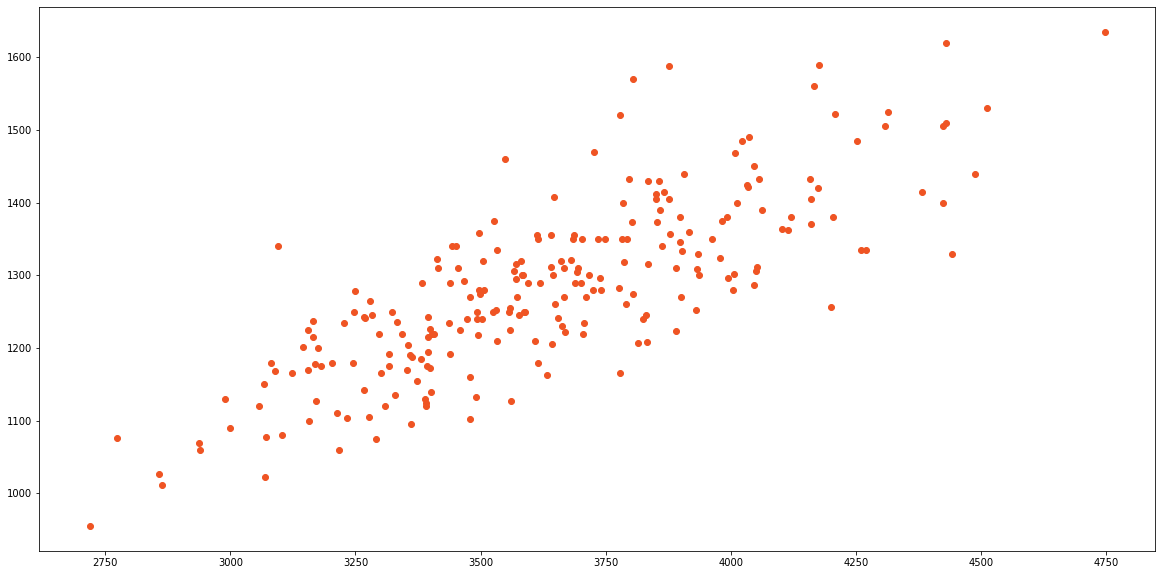

In [ ]:
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values
plt.scatter(x,y,c='#ef5423', label='Scatter Plot')

Linear Equation with one predictor variable will be in the form of Y = MX + C. In our process we need to identify "M" and "C". 

---


M = Sum[(x-x')*(y-y')]/Sum[(x-x')^2]

---


Where x' and y' is mean of the x and y

Step1: Calculate the mean of both X and Y. Two alternative function are available we can use anyone 
1. numpy.mean(): Here np.mean(x)
2. x.mean()

In [ ]:
x_mean=np.mean(x)
y_mean=np.mean(y)


Step2: Calculate Sum of (x-x')*(y-y') and (x-x')^2 for all rows. Then calculate M


In [ ]:
numberofdata = len(x)
numerator = 0
denominator = 0

for icount in range(numberofdata):
  numerator += (x[icount]-x_mean)*(y[icount]-y_mean)
  denominator += (x[icount]-x_mean)**2
M = numerator / denominator
print(M)

0.26342933948939945


Step3: Find C substituting x_mean, y_mean and M value in linear equation

In [ ]:
C=y_mean - (M * x_mean)
print(C)
print(x_mean,y_mean)

325.57342104944223
3633.9915611814345 1282.873417721519


Conclusion at this stage: Given Head size the brain weight will be 0.26 times Head size plus 325.5


Drawing Regression line in the plot

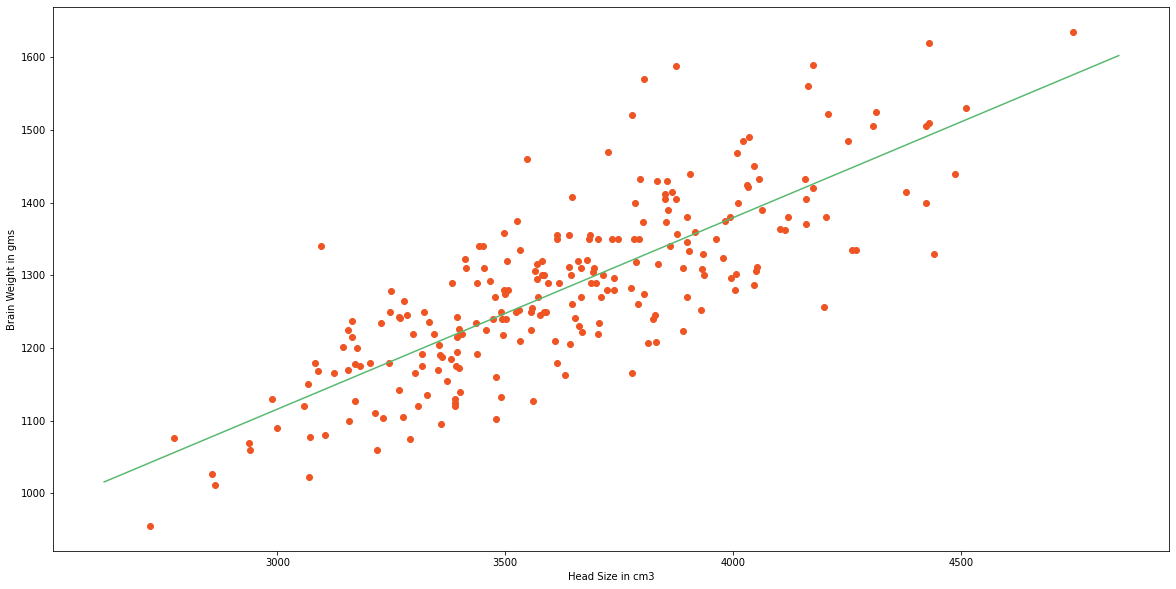

In [ ]:
max_x=np.max(x)+100
min_x=np.min(x)-100

linex=np.linspace(min_x, max_x,1000)
liney= M*linex + C

plt.plot(linex, liney, c="#58b970", label="Regression Line")
plt.scatter(x,y,c='#ef5423', label='Scatter Plot')

plt.xlabel("Head Size in cm3")
plt.ylabel("Brain Weight in gms")
plt.show()

Verification of model with Rsquare method
R^2 = Sum(Yp-y')^2 / Sum (y-y')^2

In [ ]:
r2numerator=0
r2denominator=0

for icount in range(numberofdata):
  ypredicted = M * x[icount] + C
  r2denominator += (y[icount]-y_mean)**2
  r2numerator += (ypredicted - y_mean)**2
r2 = r2numerator / r2denominator

print(1-r2)

0.3606882800429999
